In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D

### **Importing image**

In [2]:
image=cv2.imread(r'/content/lena_gray.jpg')

In [3]:
image.shape

(512, 512, 3)

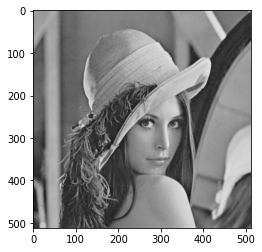

In [4]:
plt.imshow(image)
plt.show()

### Preprocessing Input Image

In [5]:
# resized_image = cv2.resize(image,(256,256))
# resized_image.shape

In [6]:
# plt.imshow(resized_image)
# plt.show()

In [7]:
img_data = []
len(img_data)

0

In [8]:
img_data_reshaped = np.reshape(img_data,newshape=(len(img_data),512,512,3))
img_data_reshaped.shape

(0, 512, 512, 3)

In [9]:
from keras.preprocessing.image import img_to_array
img_data.append(img_to_array(image))

In [10]:
img_data

[array([[[161., 161., 161.],
         [162., 162., 162.],
         [163., 163., 163.],
         ...,
         [170., 170., 170.],
         [152., 152., 152.],
         [128., 128., 128.]],
 
        [[162., 162., 162.],
         [162., 162., 162.],
         [162., 162., 162.],
         ...,
         [171., 171., 171.],
         [154., 154., 154.],
         [129., 129., 129.]],
 
        [[163., 163., 163.],
         [163., 163., 163.],
         [162., 162., 162.],
         ...,
         [170., 170., 170.],
         [155., 155., 155.],
         [128., 128., 128.]],
 
        ...,
 
        [[ 44.,  44.,  44.],
         [ 44.,  44.,  44.],
         [ 48.,  48.,  48.],
         ...,
         [102., 102., 102.],
         [101., 101., 101.],
         [ 99.,  99.,  99.]],
 
        [[ 45.,  45.,  45.],
         [ 44.,  44.,  44.],
         [ 51.,  51.,  51.],
         ...,
         [103., 103., 103.],
         [108., 108., 108.],
         [105., 105., 105.]],
 
        [[ 43.,  43.,  43.],
 

In [11]:
img_data_reshaped = np.reshape(img_data,newshape=(len(img_data),512,512,3))
img_data_reshaped.shape

(1, 512, 512, 3)

In [12]:
# Normalization
img_data_normalized = img_data_reshaped.astype('float32')/255
img_data_normalized.shape

(1, 512, 512, 3)

### Preprocessing Target image

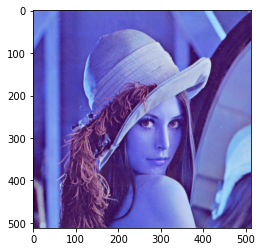

In [13]:
rgb_image=cv2.imread(r'/content/Lena_color.png')
plt.imshow(rgb_image)
plt.show()

In [14]:
rgb_image = cv2.cvtColor(rgb_image,cv2.COLOR_BGR2RGB)

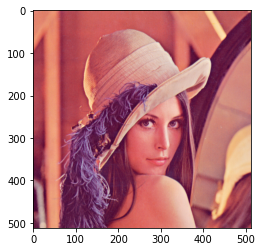

In [15]:
plt.imshow(rgb_image)
plt.show()

In [16]:
rgb_image.shape

(512, 512, 3)

In [17]:
# resized_color_image = cv2.resize(rgb_image,(256,256))
# resized_color_image.shape

In [18]:
img_color_data = []
len(img_color_data)

0

In [19]:
from keras.preprocessing.image import img_to_array
img_color_data.append(img_to_array(rgb_image))

In [20]:
img_data_color_reshaped = np.reshape(img_color_data,newshape=(len(img_color_data),512,512,3))
img_data_color_reshaped.shape

(1, 512, 512, 3)

In [21]:
img_data_color_normalized = img_data_color_reshaped.astype('float32')/255
img_data_color_normalized.shape

(1, 512, 512, 3)

# **Encoding Architecture**

In [22]:
model =  Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding='same',activation='relu',input_shape=(512, 512, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters = 64, kernel_size = (3,3), strides=(1, 1), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters = 128, kernel_size = (3,3), strides=(1, 1), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 128)      0

# **Decoding Architecture**

In [23]:
model.add(Conv2D(filters = 128, kernel_size = (3,3), strides=(1, 1), padding='same',activation='relu'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), strides=(1, 1), padding='same',activation='relu'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding='same',activation='relu'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(filters = 3, kernel_size = (3,3), strides=(1, 1), padding='same',activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 128)      0

# **Model Compilation**

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 128)      0

In [25]:
model.fit(x=img_data_normalized, y=img_data_color_normalized,epochs=150)

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.2851 - accuracy: 0.9629
Epoch 2/150
1/1 [==============================] - 2s 2s/step - loss: 0.1065 - accuracy: 0.9770
Epoch 3/150
1/1 [==============================] - 1s 1s/step - loss: 0.1926 - accuracy: 0.9749
Epoch 4/150
1/1 [==============================] - 2s 2s/step - loss: 0.0225 - accuracy: 0.9771
Epoch 5/150
1/1 [==============================] - 2s 2s/step - loss: 0.0523 - accuracy: 0.9772
Epoch 6/150
1/1 [==============================] - 1s 1s/step - loss: 0.0713 - accuracy: 0.9751
Epoch 7/150
1/1 [==============================] - 2s 2s/step - loss: 0.0653 - accuracy: 0.9714
Epoch 8/150
1/1 [==============================] - 1s 1s/step - loss: 0.0480 - accuracy: 0.9647
Epoch 9/150
1/1 [==============================] - 2s 2s/step - loss: 0.0392 - accuracy: 0.9601
Epoch 10/150
1/1 [==============================] - 1s 1s/step - loss: 0.0442 - accuracy: 0.9657
Epoch 11/150
1/1 [=====================

# **Predictions**

In [26]:
model_pred = model.predict(img_data_normalized)

In [27]:
model_pred.shape

(1, 512, 512, 3)

In [28]:
model_pred_reshaped = model_pred.reshape(512,512,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


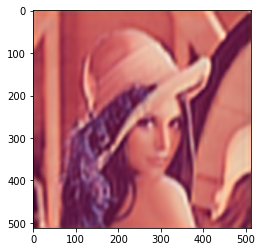

In [29]:
plt.imshow(model_pred_reshaped)
plt.show()

# **Testing with new grey image to convert to RGB using trained model**

In [30]:
image_2 = cv2.imread(r'/content/dog_gray.jpg')
image_3 = cv2.imread(r'/content/black-and-white-love-petals-57905.jpg')

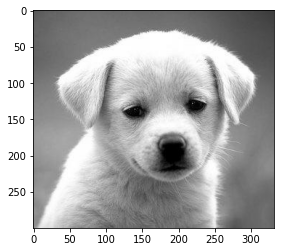

In [31]:
plt.imshow(image_2)
plt.show()

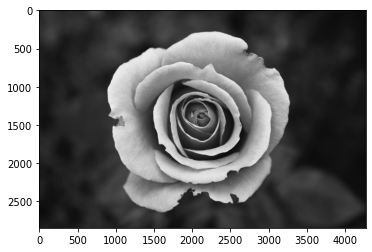

In [32]:
plt.imshow(image_3)
plt.show()

In [33]:
print(image_2.shape)
print(image_3.shape)

(300, 332, 3)
(2848, 4272, 3)


In [34]:
rgb_image2 = cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)
resized_image2 = cv2.resize(rgb_image2,(512,512))
img_data.append(img_to_array(resized_image2))

In [35]:
rgb_image3 = cv2.cvtColor(image_3,cv2.COLOR_BGR2RGB)
resized_image3 = cv2.resize(rgb_image3,(512,512))
img_data.append(img_to_array(resized_image3))

In [36]:
img_data_reshaped = np.reshape(img_data,newshape=(len(img_data),512,512,3))
img_data_normalized = img_data_reshaped.astype('float32')/255
img_data_normalized.shape

(3, 512, 512, 3)

In [37]:
pred = model.predict(img_data_normalized)

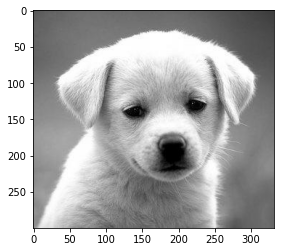

In [38]:
plt.imshow(image_2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


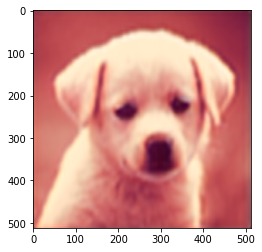

In [39]:
model_pred_reshaped_2 = pred[1].reshape(512,512,3)
plt.imshow(model_pred_reshaped_2)
plt.show()

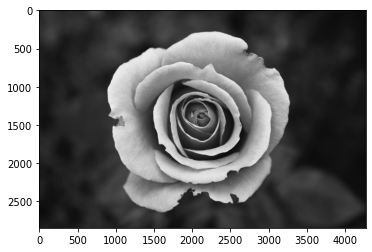

In [40]:
plt.imshow(image_3)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


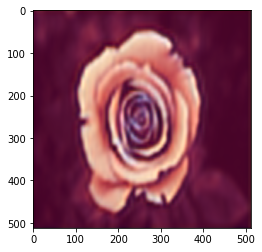

In [41]:
model_pred_reshaped_3 = pred[2].reshape(512,512,3)
plt.imshow(model_pred_reshaped_3)
plt.show()